<p align="center">
  <a href="https://imc.uc.cl" target="_blank">
    <img src="attachment:image.png" alt="IMC" width="220">
  </a>
</p>

# IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Profesor:** Rodrigo A. Carrasco <br>
---


## Tarea 04 – Aprendizaje automático

- **Fecha de Entrega:** 13 de noviembre de 2025, a las 23:59.
- **Fecha de publicación**: 30 de octubre de 2025.
- **Formato de entrega:** Notebook ejecutado y comentado (`.ipynb`) en el módulo de Tarea 04 habilitado en Canvas.

## Instrucciones

- Esta Tarea debe desarrollarse de manera totalmente *individual*, de acuerdo a lo establecido en la sección de Integridad Académica en el programa del curso.
- La Tarea debe ser desarrollada en lenguaje de programación Python y la entrega en formato Jupyter Notebook.
- El desarrollo del Notebook debe ser claro y ordenado, incluyendo anotaciones (markdown) y comentarios que permitan seguir fácilmente el código y los pasos implementados a los correctores, y siguiendo buenas prácticas de programación. La presentación y claridad del notebook y código forman parte de la evaluación de la tarea.
- Notebook **autocontenible** que:
   - Ejecute sin errores todas las celdas.
  - Contenga tanto el código como los comentarios y explicaciones necesarias.
  - Incluya visualizaciones claras y correctamente etiquetadas.
- No se aceptarán notebooks con celdas rotas o que dependan de rutas externas no indicadas en la tara.

- Deben hacer sus consultas y comentarios sobre la Tarea a traves del canal de Tareas en eo del curso en Canvas.os.
cteriza.

## 1. Objetivos

- Aplicar los conceptos iniciales de manejo de datos y análisis exploratorio vistos en clases.
- Practicar la lectura, limpieza y manipulación de datos en Python.
- Desarrollar habilidades para visualizar y describir patrones y tendencias en conjuntos de datos reales.
- Fomentar la capacidad de comunicar resultados de forma clara y fundamentada.

### 1.1 Objetivo educacional

Esta Tarea tiene como objetivo que los estudiantes desarrollen la capacidad de manejar algunas de las librerías centrales para el desarrollo de Ciencia de Datos, con foco en la lectura y exploración de datos. 

### 1.2 Pregunta de ciencia de datos

Esta tarea tendrá como objetivo crear un predictor que determine el éxito o fracaso de una expedición a distintas montañas del Himalayas según datos del montañista y de la expedición. Vamos a responder a la pregunta de qué tan bien pueden atributos como año, estación, montaña, edad del montañista, entre otros, predecir el éxito o fracaso de una expedición.

### 1.3 Recomendaciones
- Utiliza las librerías sugeridas en el notebook o justifica brevemente si incorporas otras.
- Revisa que todas las celdas se ejecuten en orden, desde el inicio, sin errores.
- Comenta tu código para explicar qué hace cada sección relevante.
- Asegúrate de que las visualizaciones sean fáciles de interpretar y tengan títulos y etiquetas adecuados.

## 2. Datos

[The Himalayan Database](https://www.himalayandatabase.com/) consiste en una colección de registros de expediciones en la cordillera del Himalaya. Esta contiene información detallada de las cimas más altas del mundo, junto con miles de expediciones realizadas desde 1905 hasta 2024 e información de cada uno de los/las montañistas que han participado en ellas. (El dataset que utilizaremos fue extraído desde: https://mavenanalytics.io/data-playground/himalayan-expeditions)

Descargue el archivo `Himalayan+Expeditions.zip` disponible en el repositorio del curso. Como puede ver, esta información está separada en varios archivos `.csv`. Deberá utilizar las herramientas aprendidas durante el curso para juntar esta información, procesarla y crear un predictor que determine el éxito de una subida.

**Recomendación**: Puede revisar el archivo `himalayan_data_dictionary.csv` para saber el significado de cada una de las columnas de la base de datos.

### 2.1 Librerías

Para esta tarea puede utilizar cualquiera de las librerías previamente utilizadas en el curso. Puede agregar otras si lo estima conveniente para el desarrollo de la Tarea.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# ...agreuge otras librerías si lo considera relevante

## 3. Carga y limpieza (1 punto)

### 3.1 DataFrame unificado (0.2 pts)

Inspeccione los atributos de cada dataset y extraiga la siguiente información de ellos:

1. Información de las montañas:
    * ID de la cima (`peakid`)
    * Nombre común de la montaña (`pkname`)
    * Altura (m) (`heightm`)
    * Cantidad de expediciones exitosas (`success_exp`)
    * Cantidad de expediciones fallidas (`failed_exp`)

2. Información de las expediciones:
    * ID de la expedición (`expid`)
    * Año (`year`)
    * Estación del año (`season`)

3. Información de los montañistas:
    * ID del miembro (`memid`)
    * Sexo (`sex`)
    * Año de nacimiento (`yob`)
    * Nacionalidad (`citizen`)
    * Completó la expedición exitosamente (`msuccess`)

Genere un único DataFrame con todos estos atributos, donde cada fila represente el ascenso de un/a montañista en una expedición. (Ojo que esto no necesariamente significa que cada fila será una persona diferente: si una persona escaló dos cumbres distintas en dos expediciones, esta debería aparecer en su DataFrame como dos filas separadas.)


In [41]:
peaks_df = pd.read_csv('peaks_with_exp.csv') 
exped_df = pd.read_csv("exped.csv")
members_df = pd.read_csv("members.csv")

C:\Users\Liz\AppData\Local\Temp\ipykernel_19252\4282463302.py:2: DtypeWarning: Columns (8,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  exped_df = pd.read_csv("exped.csv")
C:\Users\Liz\AppData\Local\Temp\ipykernel_19252\4282463302.py:3: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  members_df = pd.read_csv("members.csv")


In [76]:
peak_cols = ['peakid', 'pkname', 'heightm', 'success_exp', 'failed_exp']
peaks_subset_df = peaks_df[peak_cols]

exped_cols_subset = ['expid', 'year', 'season']
exped_subset_df = exped_df[exped_cols_subset]

member_cols_original = ['expid', 'peakid', 'membid', 'sex', 'yob', 'citizen', 'msuccess'] # El nombre real es 'membid'
members_subset_df = members_df[member_cols_original].copy()
members_subset_df.rename(columns={'membid': 'memid'}, inplace=True) # Renombramos

merged_df = pd.merge(members_subset_df, exped_subset_df, on='expid', how='left')

# Unimos el resultado con el subset de peaks (que YA tiene success_exp y failed_exp)
final_df = pd.merge(merged_df, peaks_subset_df, on='peakid', how='left')

# limpieza final de nulos en los conteos (para cimas sin expediciones)
final_df['success_exp'] = final_df['success_exp'].fillna(0)
final_df['failed_exp'] = final_df['failed_exp'].fillna(0)

print(f"DataFrame unificado: {final_df.shape}")
print("Columnas del DataFrame unificado:")
print(final_df.info())
final_df.head()

DataFrame unificado: (89089, 13)
Columnas del DataFrame unificado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89089 entries, 0 to 89088
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   expid        89089 non-null  object 
 1   peakid       89089 non-null  object 
 2   memid        89089 non-null  int64  
 3   sex          89089 non-null  object 
 4   yob          83665 non-null  float64
 5   citizen      89082 non-null  object 
 6   msuccess     89089 non-null  bool   
 7   year         89089 non-null  int64  
 8   season       89089 non-null  object 
 9   pkname       89089 non-null  object 
 10  heightm      89089 non-null  int64  
 11  success_exp  89089 non-null  int64  
 12  failed_exp   89089 non-null  int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 8.2+ MB
None


,expid,peakid,memid,sex,yob,citizen,msuccess,year,season,pkname,heightm,success_exp,failed_exp
0,AMAD01101,AMAD,2,M,1972.0,Australia,False,2001,Spring,Ama Dablam,6814,1123,453
1,AMAD01101,AMAD,1,M,1968.0,Australia,False,2001,Spring,Ama Dablam,6814,1123,453
2,AMAD01101,AMAD,3,M,1960.0,Australia,False,2001,Spring,Ama Dablam,6814,1123,453
3,AMAD01101,AMAD,4,M,1966.0,Australia,False,2001,Spring,Ama Dablam,6814,1123,453
4,AMAD01101,AMAD,5,F,1970.0,Australia,False,2001,Spring,Ama Dablam,6814,1123,453


### 3.2 Limpieza y transformación (0.2 pts)

Inspeccione y procese su DataFrame para generar uno nuevo llamado `clean_df`. En esta sección usted debe decidir si es necesario:

* Limpiar valores nulos, duplicados o inválidos.
* Imputar valores.
* Transformar tipos de columnas.

Justifique su procesamiento.

In [ ]:
# Copiamos el dataframe para la limpieza para que luego no exista confusión entre el original y el limpio
clean_df = final_df.copy()

# Revisamos valores nulos iniciales antes de la limpieza de datos
print("Valores nulos ANTES de limpiarse:")
print(clean_df.isnull().sum())

# Eliminamos filas donde el objetivo (msuccess) es nulo
clean_df.dropna(subset=['msuccess'], inplace=True)

# Eliminamos filas donde 'yob' es nulo o 0, ya que podrian ser necesarios para calcular la edad de los miembros
clean_df = clean_df[clean_df['yob'].notna()]
clean_df = clean_df[clean_df['yob'] != 0]

# Eliminamos filas con nulos en otras columnas clave para el analisis
clean_df.dropna(subset=['season', 'sex', 'citizen', 'pkname', 'heightm'], inplace=True)

print("\nValores nulos DESPUES de limpiarse:")
print(clean_df.isnull().sum())

# Convertimos 'msuccess' de Boolean (True/False) a Integer (1/0) para facilitar el analisis
clean_df['msuccess'] = clean_df['msuccess'].astype(int)

# Convertimos 'yob' y 'year' a enteros (son años, no deberian tener decimales) para facilitar el analisis
clean_df['yob'] = clean_df['yob'].astype(int)
clean_df['year'] = clean_df['year'].astype(int)

print(f"Dimensiones del DataFrame limpio: {clean_df.shape}")
clean_df.head()

Valores nulos ANTES de limpiarse:
expid             0
peakid            0
memid             0
sex               0
yob            5424
citizen           7
msuccess          0
year              0
season            0
pkname            0
heightm           0
success_exp       0
failed_exp        0
dtype: int64

Valores nulos DESPUES de limpiarse:
expid          0
peakid         0
memid          0
sex            0
yob            0
citizen        0
msuccess       0
year           0
season         0
pkname         0
heightm        0
success_exp    0
failed_exp     0
dtype: int64
Dimensiones del DataFrame limpio: (83665, 13)


,expid,peakid,memid,sex,yob,citizen,msuccess,year,season,pkname,heightm,success_exp,failed_exp
0,AMAD01101,AMAD,2,M,1972,Australia,0,2001,Spring,Ama Dablam,6814,1123,453
1,AMAD01101,AMAD,1,M,1968,Australia,0,2001,Spring,Ama Dablam,6814,1123,453
2,AMAD01101,AMAD,3,M,1960,Australia,0,2001,Spring,Ama Dablam,6814,1123,453
3,AMAD01101,AMAD,4,M,1966,Australia,0,2001,Spring,Ama Dablam,6814,1123,453
4,AMAD01101,AMAD,5,F,1970,Australia,0,2001,Spring,Ama Dablam,6814,1123,453


### 3.2 Creación de nuevas columnas (0.6 pts)

Vamos a crear un par de columnas nuevas que nos ayudarán a hacer una análisis exploratorio del dataset.
Utilizando las columnas actuales, genere y agregue las siguientes columnas a su DataFrame:

* `age`: Edad del montañista a la fecha de la expedición.
* `peak_success_p`: Porcentaje de expediciones exitosas de la cima respectiva.

De ser necesario, aplique procesos de limpieza y transformación a estas columnas también (asegúrese de que todos los valores sean coherentes).

In [ ]:

clean_df['age'] = clean_df['year'] - clean_df['yob']
total_exp = clean_df['success_exp'] + clean_df['failed_exp']
# Limpiamos posibles divisiones por cero o NaN
clean_df['peak_success_p'] = (clean_df['success_exp'] / total_exp).fillna(0)
# Filtramos edades poco probables de subir montañas
clean_df = clean_df[(clean_df['age'] > 7) & (clean_df['age'] < 86)]
print(clean_df[['age', 'peak_success_p']].describe())
clean_df.head()

                age  peak_success_p
count  83590.000000    83590.000000
mean      38.290358        0.581325
std       10.579652        0.144195
min       12.000000        0.000000
25%       30.000000        0.500000
50%       37.000000        0.633554
75%       45.000000        0.636983
max       86.000000        1.000000


,expid,peakid,memid,sex,yob,citizen,msuccess,year,season,pkname,heightm,success_exp,failed_exp,age,peak_success_p
0,AMAD01101,AMAD,2,M,1972,Australia,0,2001,Spring,Ama Dablam,6814,1123,453,29,0.712563
1,AMAD01101,AMAD,1,M,1968,Australia,0,2001,Spring,Ama Dablam,6814,1123,453,33,0.712563
2,AMAD01101,AMAD,3,M,1960,Australia,0,2001,Spring,Ama Dablam,6814,1123,453,41,0.712563
3,AMAD01101,AMAD,4,M,1966,Australia,0,2001,Spring,Ama Dablam,6814,1123,453,35,0.712563
4,AMAD01101,AMAD,5,F,1970,Australia,0,2001,Spring,Ama Dablam,6814,1123,453,31,0.712563


In [61]:
# respuestas: Puse de edad minima 7 años porque segun describe el minimo fue de 7. 
# La edad máxima la puse en 86 años porque segun describe el maximo fue de 86. 


## 4. EDA (2.5 puntos)

Con el dataset obtenido, responda las siguientes preguntas. Para cada una de ellas, realice al menos un gráfico que permita visualizar el comportamiento de su dataset.

a. **(0.5 pts)** ¿Cuántos ascensos exitosos y fallidos hay en su dataset? ¿A qué porcentaje del total corresponde cada categoría?

b. **(0.5 pts)** ¿Cómo se distribuyen las edades de los/las montañistas en la base de datos?

c. **(0.5 pts)** ¿Cómo se distribuye la cantidad de ascensos según estación del año? ¿Cuál es el porcentaje de éxito por estación? Muestre la cantidad de filas de ascensos exitosas y fallidas para cada estación.

d. **(0.5 pts)** ¿Cómo cambia la cantidad de ascensos en el tiempo? Muestre la cantidad de ascensos exitosos y fallidos por año.

e. **(0.5 pts)** ¿Existe una correlación entre el porcentaje de éxito de ascenso y la altura de una cumbre? Haga un scatterplot para todas las cumbres que hayan sido escaladas por al menos 10 expediciones en total (tanto fallidas como exitosas).

Conteo de ascensos (1=Exito, 0=Fracaso):
msuccess
0    48330
1    35260
Name: count, dtype: int64

Porcentaje de ascensos:
msuccess
0    57.817921
1    42.182079
Name: proportion, dtype: float64


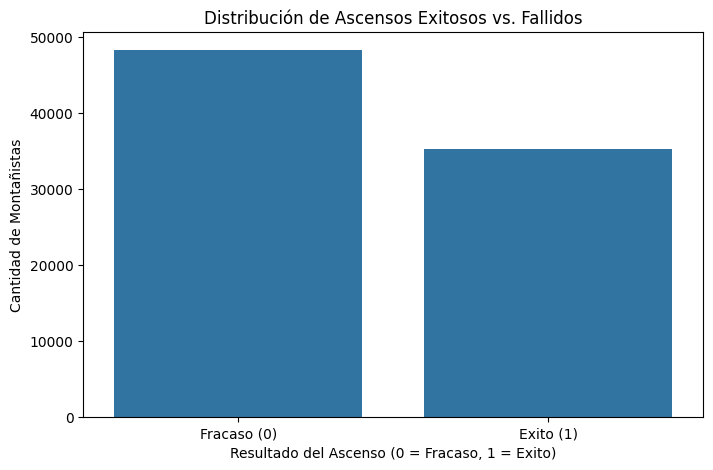

In [62]:
# a) 
success_counts = clean_df['msuccess'].value_counts()
success_percentages = clean_df['msuccess'].value_counts(normalize=True) * 100

print("Conteo de ascensos (1=Exito, 0=Fracaso):")
print(success_counts)
print("\nPorcentaje de ascensos:")
print(success_percentages)
plt.figure(figsize=(8, 5))
sns.countplot(data=clean_df, x='msuccess')
plt.title('Distribución de Ascensos Exitosos vs. Fallidos')
plt.xlabel('Resultado del Ascenso (0 = Fracaso, 1 = Exito)')
plt.ylabel('Cantidad de Montañistas')
plt.xticks([0, 1], ['Fracaso (0)', 'Exito (1)'])
plt.show()

respuesta: Hay 48331 fracasos y 35260 de exito, sus porcentajes respectivos son del 57,8% y 42,1%.

count    83590.000000
mean        38.290358
std         10.579652
min         12.000000
25%         30.000000
50%         37.000000
75%         45.000000
max         86.000000
Name: age, dtype: float64


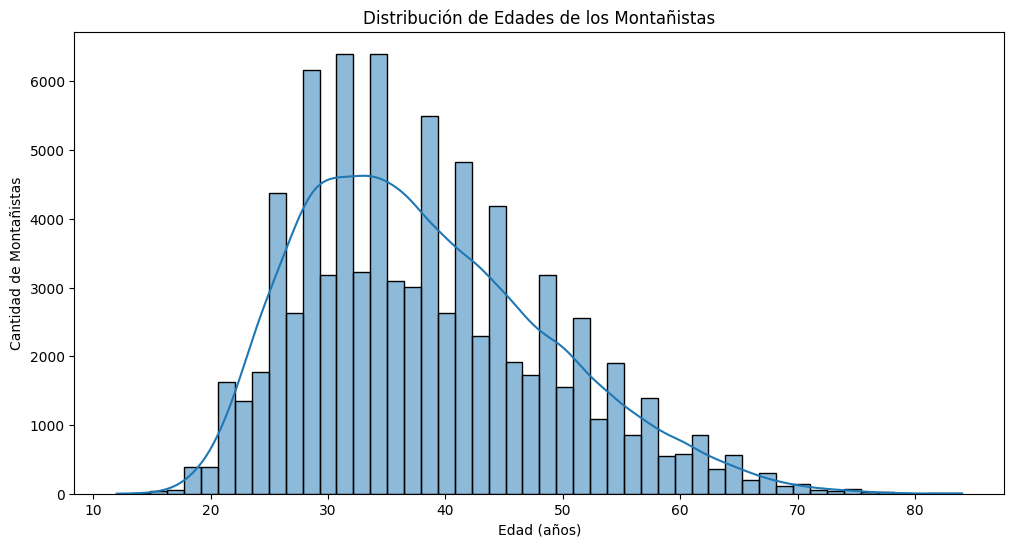

In [63]:
# b)
reasonable_ages_df = clean_df[(clean_df['age'] > 7) & (clean_df['age'] < 86)] 
print(clean_df['age'].describe())
plt.figure(figsize=(12, 6))
sns.histplot(data=reasonable_ages_df, x='age', bins=50, kde=True)
plt.title('Distribución de Edades de los Montañistas')
plt.xlabel('Edad (años)')
plt.ylabel('Cantidad de Montañistas')
plt.show()

respuesta:La edad promedio fue de 38 años aproximadamente y la mediana fue del 37 años. Segun el grafico se puede ver que hay periodos de 1 o 2 años con respecto a la edad aprox. donde puede deberse a contextos de planificacion financiera o por preparacion fisica entre otras causas que afecten el numero de montañistas durante ese lapso de tiempo segun su edad.

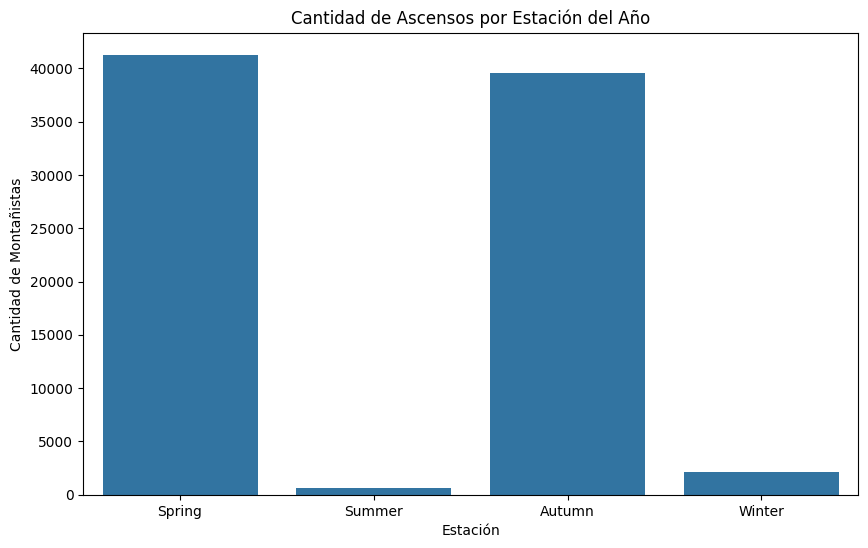

Porcentaje de exito por estacion:
season
Spring    45.983386
Autumn    39.479876
Summer    27.286822
Winter    23.105882
Name: msuccess, dtype: float64

cantidad de filas exitosas y fallidas por estacion:
msuccess      0      1  Total
season                       
Autumn    23923  15606  39529
Spring    22304  18987  41291
Summer      469    176    645
Winter     1634    491   2125
Total     48330  35260  83590


In [ ]:
#c)
# Gráfico de cantidad de ascensos por estacion
plt.figure(figsize=(10, 6))
sns.countplot(data=clean_df, x='season', order=['Spring', 'Summer', 'Autumn', 'Winter'])
plt.title('Cantidad de Ascensos por Estación del Año')
plt.xlabel('Estación')
plt.ylabel('Cantidad de Montañistas')
plt.show()

# Exito por estación
season_success_rate = clean_df.groupby('season')['msuccess'].mean().sort_values(ascending=False)
print("Porcentaje de exito por estacion:")
print(season_success_rate * 100)

# cantidad de filas exitosas y fallidas por estacion
print()
print("cantidad de filas exitosas y fallidas por estacion:")
print(pd.crosstab(clean_df['season'], clean_df['msuccess'], margins=True, margins_name="Total"))

# Este codigo se hizo con ayuda de IA el prompt : "Analiza la tasa de éxito de ascensos por
#  estación del año en un conjunto de datos de montañistas."

respuesta: Se puede ver que los montañistas escogen las estaciones de primavera y otoño, claramente por la mejor estabilidad en el clima( ni muy frio o muy caluroso para subir la cima), por otra parte se puede evidenciar que esta decision se puede sustentar por la tasa de existo de dichas expediciones en las temporadas de primavera y otoño, donde la taza de exitos es de 45,9% y 39,4% respectivamente, en comparacion con verano e invierno que son de 27,2% y 23,1% respectivamente.

<Figure size 1500x700 with 0 Axes>

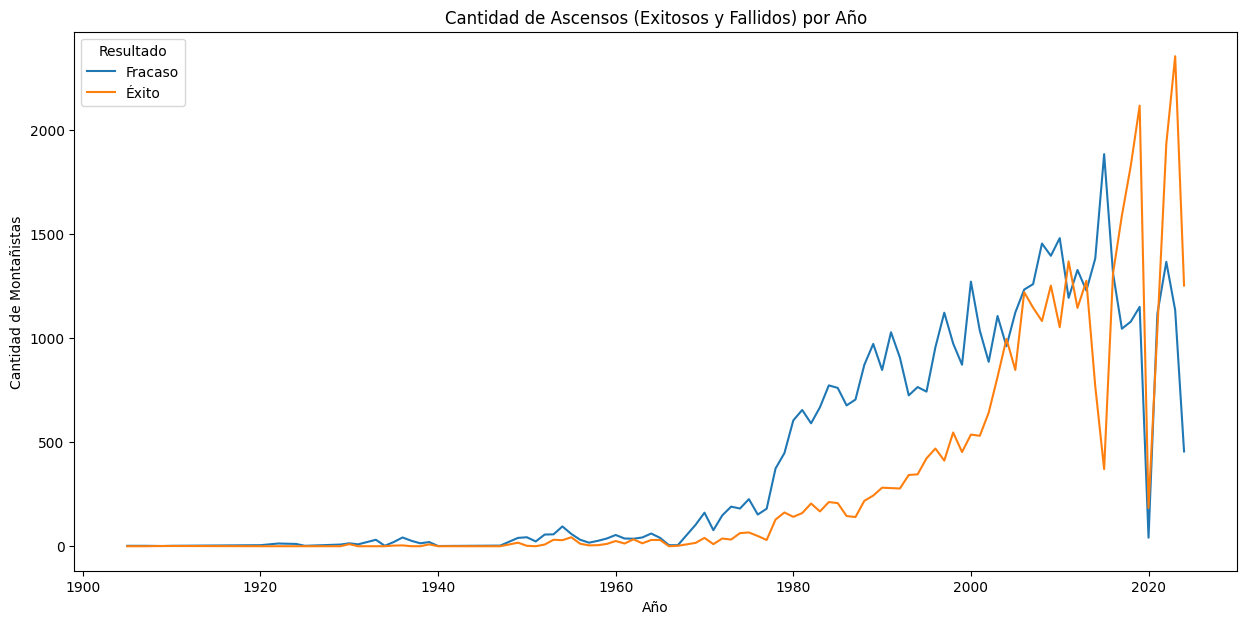

In [53]:
#d)
year_counts = clean_df.groupby(['year', 'msuccess']).size().unstack(fill_value=0)
year_counts.columns = ['Fracaso', 'Éxito']
plt.figure(figsize=(15, 7))
year_counts.plot(kind='line', stacked=False, figsize=(15, 7))
plt.title('Cantidad de Ascensos (Exitosos y Fallidos) por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Montañistas')
plt.legend(title='Resultado')
plt.show()

respuesta: Se puede evidenciar que la cantidad de montañistas a aumentado con los años, ademas la tasa de exito en algun periodo entre 2000-2020 supero a la tasa de fracaso, podria ser quizas por el aumento de la tecnologia para escalar montañas ademas del perfeccionamiento de tecnicas vinculadas a este deporte con los años. Ademas en el año 2020 la cantidad de montañistas disminuyo considerablemente, podria ser por el efecto de la pandemia en el año 2020.

Correlación entre Altura y Tasa de Éxito de la Cima (>= 10 exped): 0.0786


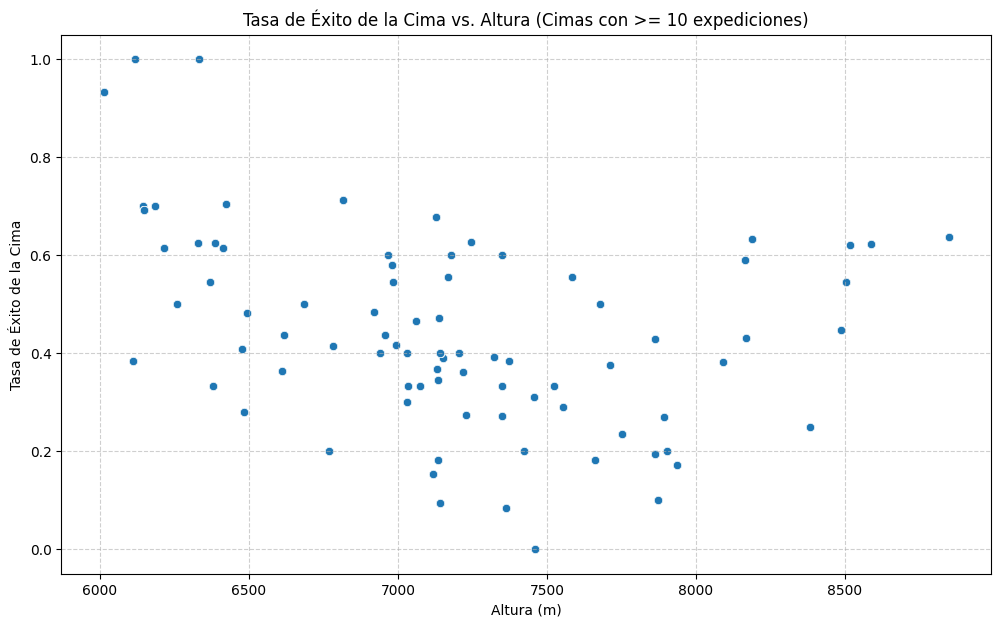

In [ ]:
#e)
clean_df['total_exp'] = clean_df['success_exp'] + clean_df['failed_exp']
peaks_filtered_df = clean_df[clean_df['total_exp'] >= 10].copy()
peaks_filtered_df['peak_success_p'] = (peaks_filtered_df['success_exp'] / peaks_filtered_df['total_exp']).fillna(0)

#Calculamos la correlación
correlation = peaks_filtered_df[['heightm', 'peak_success_p']].corr().iloc[0, 1]
print(f"Correlación entre Altura y Tasa de Éxito de la Cima (>= 10 exped): {correlation:.4f}")

# scatterplot
plt.figure(figsize=(12, 7))
sns.scatterplot(data=peaks_filtered_df, x='heightm', y='peak_success_p')
plt.title('Tasa de Éxito de la Cima vs. Altura (Cimas con >= 10 expediciones)')
plt.xlabel('Altura (m)')
plt.ylabel('Tasa de Éxito de la Cima')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
# se uso ayuda de ia para generar este codigo, el prompt fue: "Analiza la relación entre la altura de la cumbre y 
# la tasa de éxito de ascensos en un conjunto de datos de montañistas."

Respuestas: Como existe una correlacion del 0.0786, la cual es muy cercana a 0, entonces no existe una correlacion lineal entre la altura y el porcentaje de exito. Podria decirse que una montaña más baja no es significativamente más fácil de escalar que una más alta, y viceversa, según estos datos, puesto que estan muy dispersos entre si. Por ejemplo una montañá puede ser baja pero con muchos obstaculos que harian que no sea tan facil obetener el exito de llegar a la cima.

## 5. Predictor (2.5 puntos)

Ahora veremos si la información que tenemos nos permite predecir el éxito de un ascenso por alguna persona en particular. Primero, defina su **X** (matriz de atributos) e **y** (etiqueta a predecir) de la siguiente manera:

* **X**: `age`, `sex`, `citizen`, `season`, `heightm`, `year`, `success_exp`, `failed_exp`
* **y**: `msuccess`

Luego, realice los pasos a continuación:

**5.1 Codificación y normalización (1 pto)**
* Codifique todas las columnas categóricas, de manera que su matriz **X** solo tenga valores numéricos.
* Divida sus datos en sets de entrenamiento y testeo. Use una división de 70-30.
* Normalice sus matrices de atributos. Justifique su método de normalización.

**5.2 Creación y entrenamiento de modelos (1 pto)**
* Cree y entrene los siguientes modelos:
    * Un clasificador KNN
    * Un árbol de decisión
    * Un clasificador de regresión logística
    * Un clasificador random forest **(Opcional)**

    Explique qué hiperparámetros utilizó para la creación de cada uno de ellos y qué valores le asignó.

* Finalmente, evalúe todos sus modelos con el set de testeo. Para cada uno, muestre
    * Accuracy
    * Precisión
    * Recall
    * Matriz de confusión

**5.3 Análisis de resultados (0.5 pts)**

Interprete, analice y comente sus resultados. 
* ¿Qué tendencias puede observar? ¿Se diferencian de alguna forma las predicciones entre un modelo y otro? 
* ¿Fue posible construir un predictor efectivo? Justique.



In [ ]:
# 5.1
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd


features = ['age', 'heightm', 'year', 'peak_success_p', 'season', 'sex']
X = clean_df[features]
y = clean_df['msuccess']


X = pd.get_dummies(X, columns=['season', 'sex'], drop_first=True)

# Verificar tipos de datos
print("Columnas finales:", X.columns.tolist())
print("\nTipos de datos:\n", X.dtypes)

# train y Test (70-30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
# Normalizacion con StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nShape de X_train: {X_train_scaled.shape}")
print(f"Shape de X_test: {X_test_scaled.shape}")

Columnas finales: ['age', 'heightm', 'year', 'peak_success_p', 'season_Spring', 'season_Summer', 'season_Winter', 'sex_M', 'sex_X']

Tipos de datos:
 age                 int64
heightm             int64
year                int64
peak_success_p    float64
season_Spring        bool
season_Summer        bool
season_Winter        bool
sex_M                bool
sex_X                bool
dtype: object

Shape de X_train: (58513, 9)
Shape de X_test: (25077, 9)


respuesta : se uso StandardScaler porque los datos tienen variables con escalas muy diferentes como la edad y la altura por ejemplo, y por lo que se es robusto y funciona bien en la mayoría de casos. Aparte sera util en la parte 5.2 en el KNN que necesita si o si una normalizacion apropiada, pues es muy sensible a las escalas. Tambien use dummies para manejar mejor las variables categoricas.

In [95]:
# 5.2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

results = {}
models = {}

# KNN
knn = KNeighborsClassifier(
    n_neighbors=5,
    weights='uniform',
    metric='minkowski'
)
knn.fit(X_train_scaled, y_train)
models['KNN'] = knn

#  Decision Tree
tree = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)
tree.fit(X_train_scaled, y_train)
models['Decision Tree'] = tree

# Regresión Logistica
logreg = LogisticRegression(
    C=1.0,
    max_iter=1000,
    random_state=42
)
logreg.fit(X_train_scaled, y_train)
models['Logistic Regression'] = logreg

# Random Forest 
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_split=20,
    random_state=42
)
rf.fit(X_train_scaled, y_train)
models['Random Forest'] = rf

# Evaluacion de modelos
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    cm = confusion_matrix(y_test, y_pred)
    
    results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'confusion_matrix': cm
    }
    
    print(f"\n{model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print("Confusion Matrix:")
    print(cm)
    
    return results[model_name]

for name, model in models.items():
    evaluate_model(model, X_test_scaled, y_test, name)

print("\n" + "="*50)
print("COMPARACIÓN DE MODELOS")
print("="*50)
comparison_df = pd.DataFrame(results).T
print(comparison_df[['accuracy', 'precision', 'recall']])

# Este codigo se hizo con ayuda de IA el prompt fue: "Ayudame a implementar varios modelos de clasificacion que son: KNN, arbol de decision, 
# Logistica Regression, Random Forest en python usando sklearn y a evaluarlos comparativamente."


KNN:
Accuracy: 0.7016
Precision: 0.6527
Recall: 0.6250
Confusion Matrix:
[[10982  3517]
 [ 3967  6611]]

Decision Tree:
Accuracy: 0.6856
Precision: 0.6332
Recall: 0.6055
Confusion Matrix:
[[10789  3710]
 [ 4173  6405]]

Logistic Regression:
Accuracy: 0.6733
Precision: 0.6270
Recall: 0.5567
Confusion Matrix:
[[10996  3503]
 [ 4689  5889]]

Random Forest:
Accuracy: 0.6956
Precision: 0.6606
Recall: 0.5724
Confusion Matrix:
[[11388  3111]
 [ 4523  6055]]

COMPARACIÓN DE MODELOS
                     accuracy precision    recall
KNN                  0.701559  0.652745  0.624976
Decision Tree        0.685648  0.633218  0.605502
Logistic Regression  0.673326  0.627023  0.556721
Random Forest        0.695578  0.660593  0.572414


respuesta: 

Para el KNN se uso: n_neighbors=5: Valor común de inicio. Muy bajo (1-2) causa overfitting, muy alto suaviza demasiado,weights='uniform': Todos los vecinos contribuyen igualmente a la decision y metric='minkowski': Distancia Euclidiana por defecto, apropiada para datos continuos.


 Para el arbol desicion : max_depth=5: Limita la complejidad para evitar overfitting, min_samples_split=20: Evita divisiones con muy pocos datos, min_samples_leaf=10: Garantiza hojas con muestras significativas y random_state=42: Resultados reproducibles.

Para Regresion Logistica se uso : C=1.0: Regularización moderada (C pequeño = más regularización), max_iter=1000: Suficiente para converger con datos normalizados y random_state=42: Resultados consistentes.

Por ultimo, Random Forest: n_estimators=100: Balance entre performance y tiempo computacional, max_depth=5: Controla complejidad individual de cada aarbol y
min_samples_split=20: Evita overfitting en árboles individuales.

Los valores que se asignaron fueron valores por defecto por asi decirl para priorizar la generalización sobre el ajuste perfecto a los datos de entrenamiento

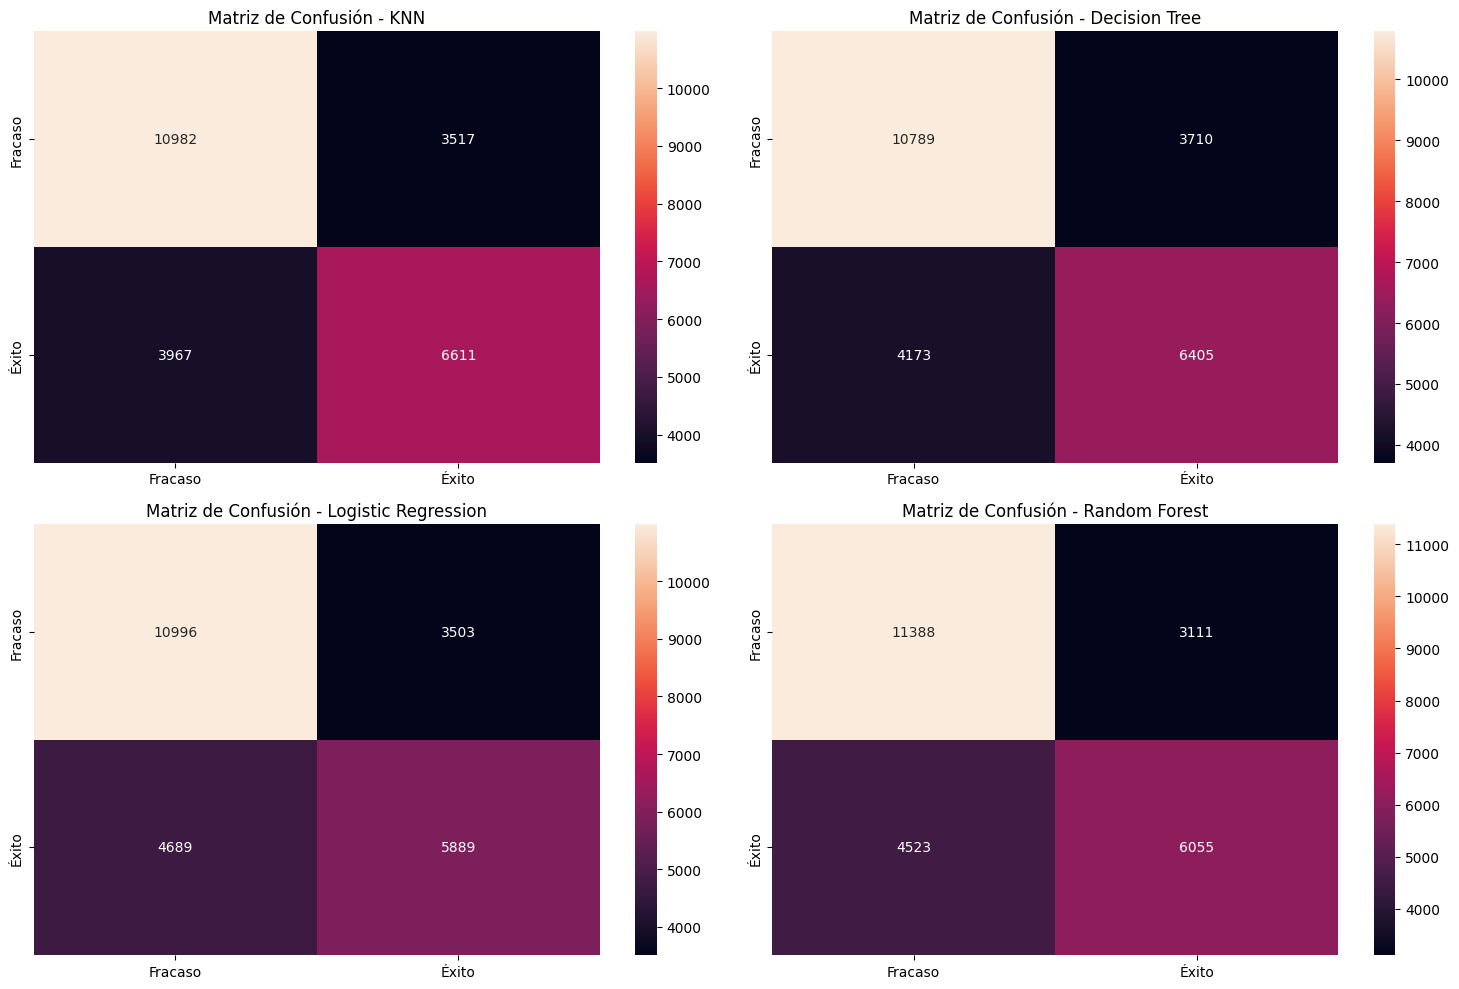

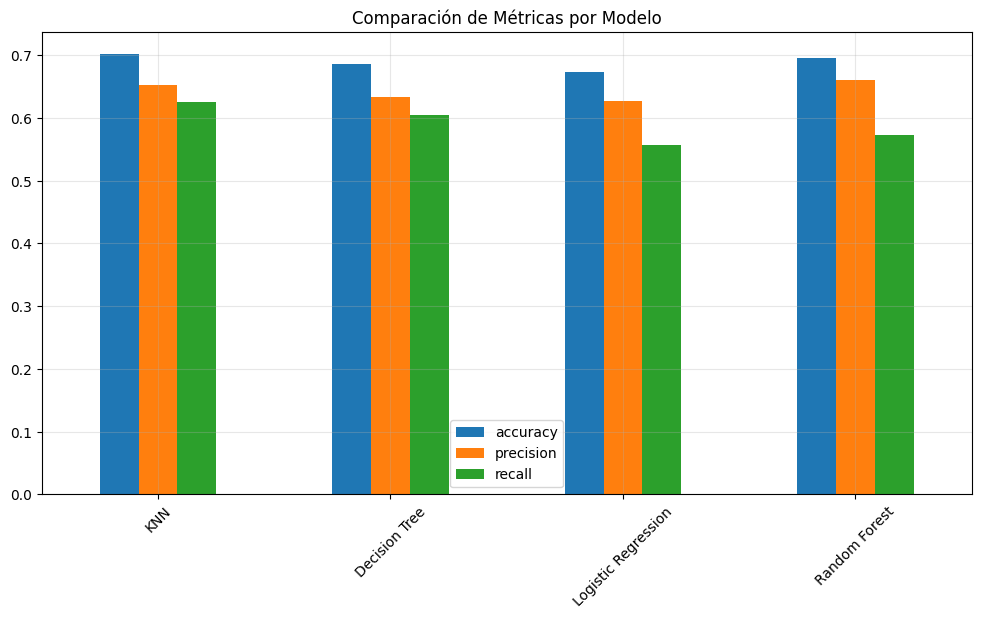

In [93]:
#5.3
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, (model_name, result) in enumerate(results.items()):
    sns.heatmap(result['confusion_matrix'], 
                annot=True, fmt='d', 
                xticklabels=['Fracaso', 'Éxito'],
                yticklabels=['Fracaso', 'Éxito'],
                ax=axes[i])
    axes[i].set_title(f'Matriz de Confusión - {model_name}')

plt.tight_layout()
plt.show()

# Grafico
metrics_df = comparison_df[['accuracy', 'precision', 'recall']]
metrics_df.plot(kind='bar', figsize=(12, 6))
plt.title('Comparación de Métricas por Modelo')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()
# Este codigo se hizo con ayuda de IA el prompt fue: "Ayudame a graficar las matrices de confusion 
# y comparar metricas de varios modelos de clasificacion en python usando sklearn."

Respuestas:
p1:

Se puede evidenciar que el mejor modelo fue el KNN, pues obtuvo el mejor rendimiento general con un aaccuracy de 70.1%, seguido muy de cerca por el Random Forest (69.5%). Se puede deducir que el KNN logro capturar bien las agrupaciones de montañistas exitosos, gracias a la normalización con StandardScaler y a la limpieza y seleccion pertinente de las caracteristicas. Sin embargo, la Regresión Logística tuvo el desempeño más bajo, especialmente en Recall (55%), lo que indica que la relación entre las variables (edad, altura, estación) y el éxito no es lineal.

p2: 

Podria construirse un predictor que seria moderadamente efectivo, pero no seguro al 100% o al menos de una forma eficaz, ya que tiene un Accuracy del 70% y eso significa que acierta en 7 de cada 10 casos, lo cual es mejor que el azar de tirar una moneda por ejemplo (osea, es 50% de probabilidad de acierto de moneda o cruz), esto lo hace menos arbitrario. Sin embargo, el modelo tiene dificultades para detectar los casos de exito ya que su Recall varia entre el 57% y 62%. Por lo que se podria decir que faltan variables mas contextuales o que expliquen con mas detalle los datos, como la condición física del montañista, su experiencia previa, el clima específico del día del ascenso, el equipamiento utilizado, el tipo de cima o el tipo de camino a la cima(rocoso, plano, empinado), etc. Entonces con solo los datos de la edad, montaña y estación, es mas dificil hacerlo mas efectivo.